# Bike Sharing Assignment

## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
    

#### Steps to follow:
1. Reading and Understanding data.
2. Performing EDA on the data.
3. Preparing the data for Model.
4. Training the model.
5. Residual Analysis.
6. Predictions and Evaluation on the Test set.

In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
 
import sklearn
import statsmodels

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Data Dictionary

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

## Step 1: Reading and Understanding the data.

In [2]:
# reading the data
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Quality check

In [3]:
# checking the number of rows
df.shape

(730, 16)

In [4]:
# checking for any missing data
df.info()

# No data is missing 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# checking the high level distribution of data
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Performing EDA on the data.

Checking the distribution of the data yearly, season, monthwise

In [6]:
#checking do we have data for all the days of two years, seasons,months and days
df['yr'].value_counts()

0    365
1    365
Name: yr, dtype: int64

In [7]:
df['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [8]:
df['mnth'].value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [9]:
print(f" Holidays in 2018 - {df[df['yr'] == 0]['holiday'].sum()}")
print(f" Holidays in 2019 - {df[df['yr'] == 1]['holiday'].sum()}")
print(f" Working days in 2018 - {df[df['yr'] == 0]['workingday'].sum()}")
print(f" Working days in 2019 - {df[df['yr'] == 1]['workingday'].sum()}")

 Holidays in 2018 - 10
 Holidays in 2019 - 11
 Working days in 2018 - 250
 Working days in 2019 - 249


In [10]:
# dropping the variables registered and casual since we are considering the cnt as the dependent variables
df = df.drop(columns = ['casual', 'registered'])

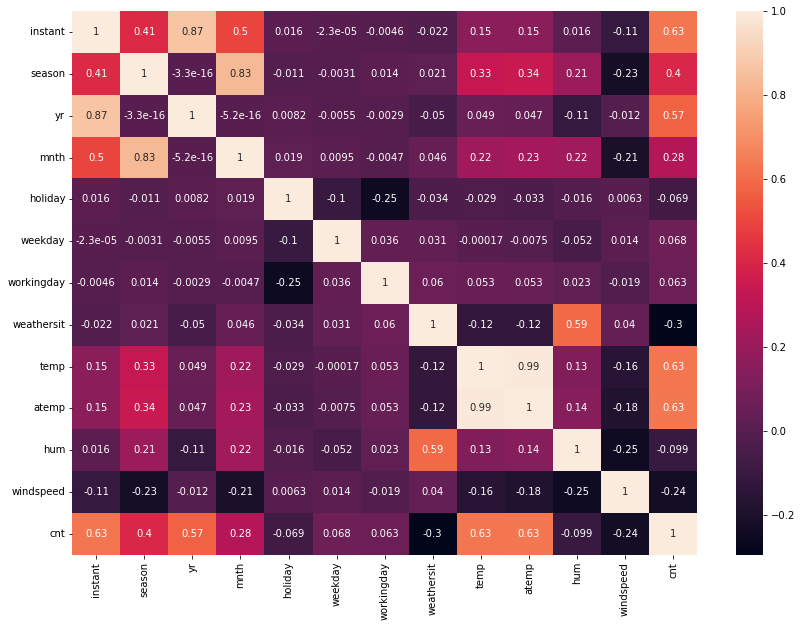

In [11]:
# Visualizing the correlation between the variables
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(), annot = True )
plt.show()

In [12]:
# creating the variable month-year by extracting the month-year from dteday column
df['month-year'] = df['dteday'].str[-7:-5] +'-'+ df['dteday'].str[-2:]

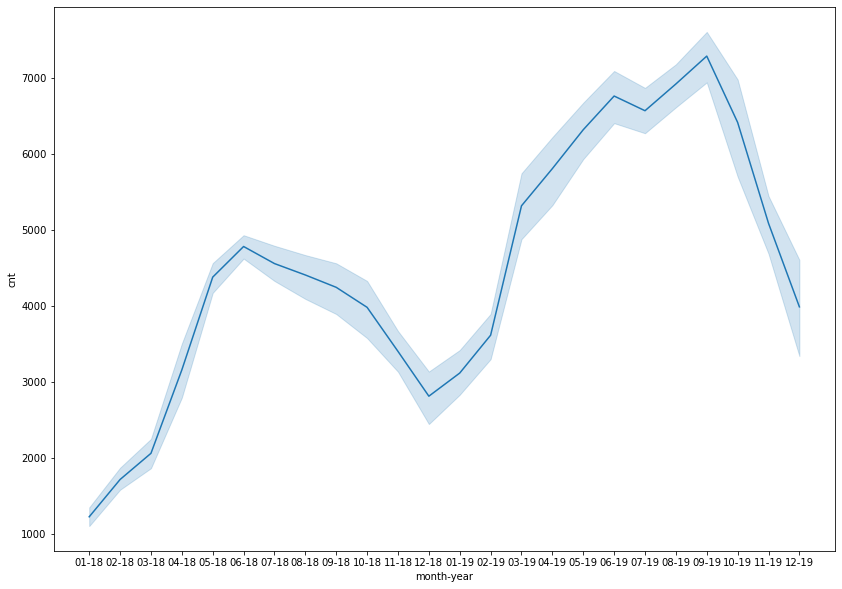

In [13]:
#visualizing the cnt over a period of time
plt.figure(figsize = (14,10))
sns.lineplot(x = df['month-year'], y = df['cnt'])
plt.show()

## Observations
From the above visualization we can conclude that in the months of december usually 'cnt' will reduce because of christmas holidays and also spring time.

In [14]:
# dropping the variables 'instant', 'dteday' and 'month-year' since there is no value add from them
df = df.drop(columns = ['instant','dteday','month-year'])

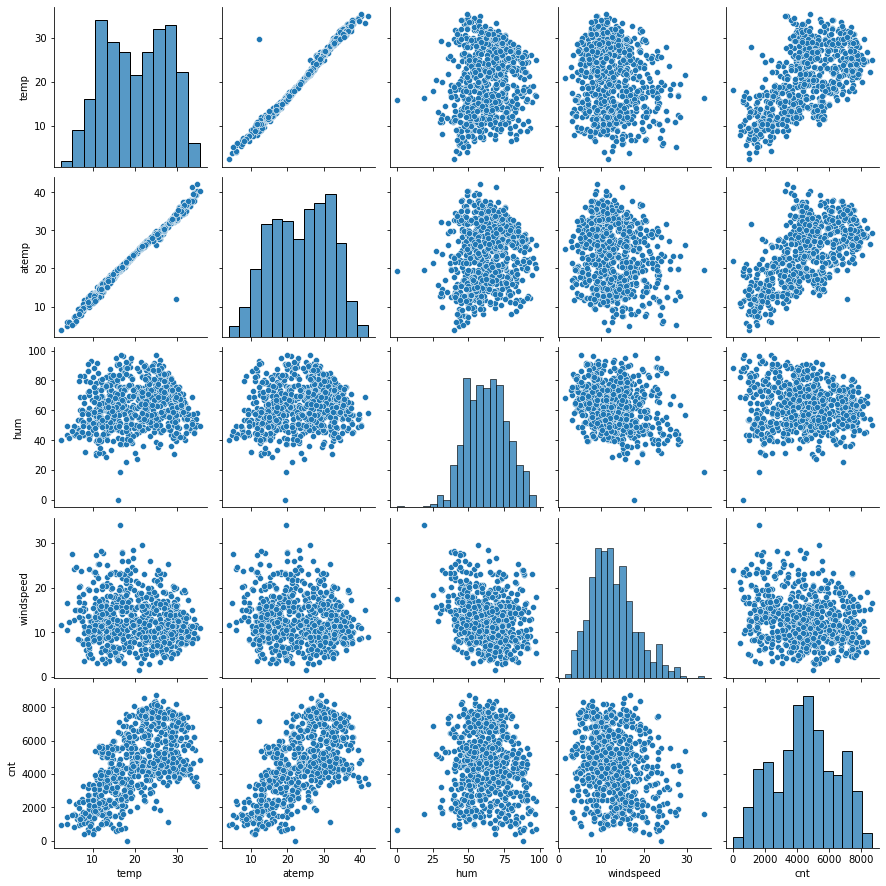

In [15]:
# Visualizing the data using the pairplot for the columns temp, hum,windspeed, cnt
sns.pairplot(df[[ 'temp','atemp', 'hum', 'windspeed', 'cnt']])
plt.show()

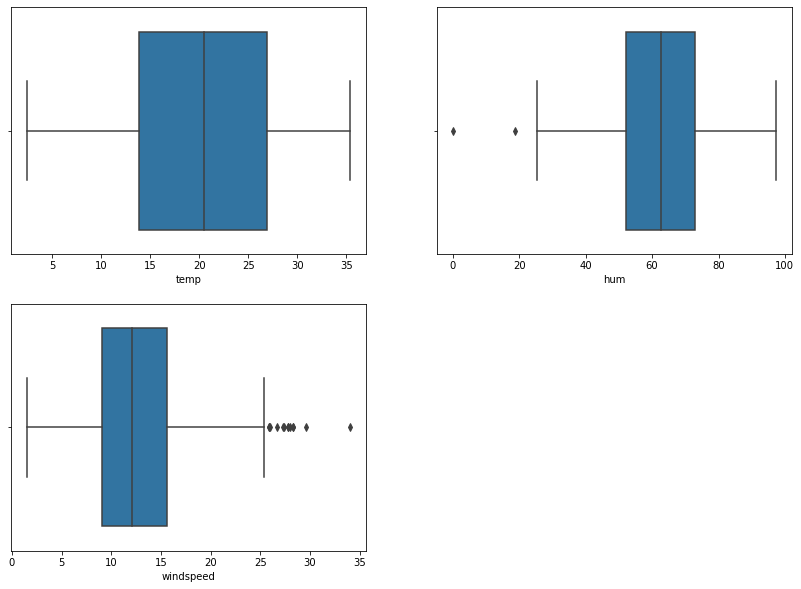

In [16]:
#cheking for outliers in the continuos variables
plt.figure(figsize = (14,10))
plt.subplot(2,2,1)
sns.boxplot(df['temp'])
plt.subplot(2,2,2)
sns.boxplot(df['hum'])
plt.subplot(2,2,3)
sns.boxplot(df['windspeed'])
plt.show()

In [17]:
# caluculating the IQR and removing the outliers from the windspeed
iqr = df['windspeed'].quantile(0.75) - df['windspeed'].quantile(0.25)
upper_limit = df['windspeed'].quantile(0.75) + 1.5*iqr
df = df[df['windspeed']<=upper_limit]
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Step 3: Preparing the data for model

In [18]:
# creating the column headers for the dummy variable columns
season_cols = ['spring','summer','fall','winter']
months_cols = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
weekday_cols = ['tue','wed','thu','fri','sat','sun','mon']
weather_cols = ['clear','haze','precipitation']

In [19]:
# get dummies for the columns season,mnth,weekday,weathersit
season = pd.get_dummies(df['season'])
season.columns = season_cols
mnth = pd.get_dummies(df['mnth'])
mnth.columns = months_cols
weekday = pd.get_dummies(df['weekday'])
weekday.columns = weekday_cols
weathersit = pd.get_dummies(df['weathersit'])
weathersit.columns = weather_cols
dummy_data = pd.concat([season,mnth,weekday,weathersit],axis =1)
dummy_data.head()

,spring,summer,fall,winter,jan,feb,mar,apr,may,jun,...,tue,wed,thu,fri,sat,sun,mon,clear,haze,precipitation
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [20]:
# concatenating the original data with dummy_data
df= pd.concat([dummy_data,df[['yr','holiday','workingday','temp','atemp','hum','windspeed','cnt']]],axis =1)
df.head()

,spring,summer,fall,winter,jan,feb,mar,apr,may,jun,...,haze,precipitation,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


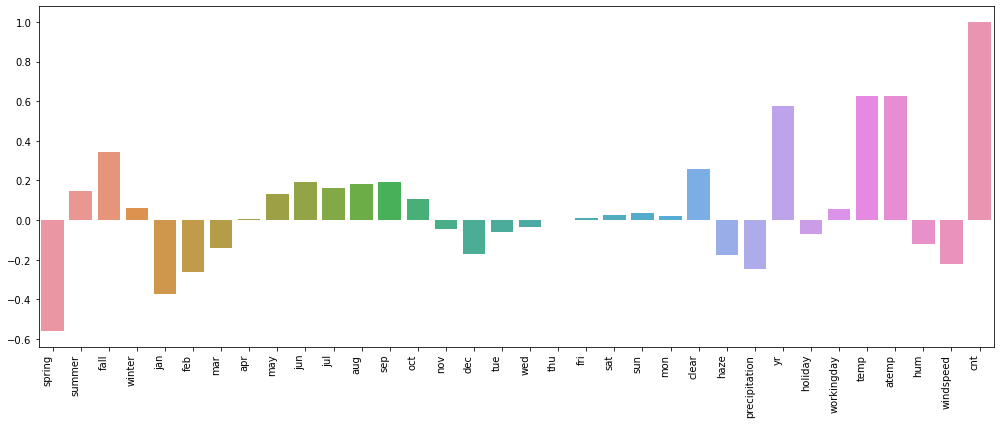

In [21]:
# Visualizing the 'cnt' correlation with other columns
plt.figure(figsize=(14, 6))
cnt_corr = df.corrwith(df['cnt'])
sns.barplot(x=cnt_corr.index, y=cnt_corr.values)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

## Observations

From the above visualization we can observe the below points:
1. seasons - Spring is negatively highly correlated and where as summer,fall and winter as posiively correlated 
2. months - nov,dec,jan,feb,march negatively correlated and where others are positively
3. weekdays - there is no much of correlation explained in weekdays
4. weather - clear weather is positively correlated and haze and percipitation are negatively
5. yr - year is high correlated with cnt
6. temp & a_temp - are also highly correlated with cnt

In [22]:
# Splitting the data into Train and Test set
df_train,df_test = train_test_split(df, train_size = 0.8, random_state = 42)

In [23]:
# checking the size of the Train data
df_train.shape

(573, 34)

In [24]:
# checking the size of the Test data
df_test.shape

(144, 34)

## Rescaling the Features

In [25]:
# scaling the Train data using MinMax scaling technique
scaler = MinMaxScaler()
df_train = scaler.fit_transform(df_train)
df_train = pd.DataFrame(df_train)
df_train.columns = ['spring', 'summer', 'fall', 'winter', 'jan', 'feb', 'mar', 'apr', 'may',
       'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'tue', 'wed', 'thu',
       'fri', 'sat', 'sun', 'mon', 'clear', 'haze', 'precipitation','yr', 'holiday',
       'workingday', 'temp', 'a_temp','hum', 'windspeed', 'cnt']

In [26]:
# check the dataframe after scaling
df_train.head()

,spring,summer,fall,winter,jan,feb,mar,apr,may,jun,...,haze,precipitation,yr,holiday,workingday,temp,a_temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.433803,0.421419,0.901146,0.751426,0.124938
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.897201,0.867429,0.599828,0.438797,0.487322
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.483928,0.480414,0.935733,0.325153,0.287297
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.818284,0.754729,0.518424,0.781497,0.781388
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.204785,0.204058,0.634403,0.301938,0.191285


## Step 4: Training the Model

## Model 1

In [27]:
# X and y trian split
y_train = df_train['cnt']
X_train = df_train[df_train.columns[:-1]]
# adding the constant to X_train
X_train_sm = sm.add_constant(X_train)
        
# create a model
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

# summary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     109.5
Date:                Mon, 14 Aug 2023   Prob (F-statistic):          3.37e-203
Time:                        21:02:23   Log-Likelihood:                 553.71
No. Observations:                 573   AIC:                            -1049.
Df Residuals:                     544   BIC:                            -923.2
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1053      0.019      5.532      0.000       0.068       0.143
spring           -0.0863      0.017     -5.061      0.000      -0.120      -0.053
summer            0.0484      0.017      2.793      0.005       0.014       0.082
fall              0.0284      0.018      1.571      0.117      -0.007       0.064
winter            0.1148      0.018      6.493      0.000       0.080       0.150
jan              -0.0152      0.024     -0.625      0.532      -0.063       0.033
feb               0.0054      0.023      0.228      0.819      -0.041       0.051
mar               0.0433      0.018      2.429      0.015       0.008       0.078
apr               0.0052      0.021      0.243      0.808      -0.037       0.047
may               0.0409      0.022      1.838      0.067      -0.003       0.085
jun               0.0141      0.021      0.665      0.506      -0.028       0.056
jul              -0.0460      0.025     -1.858      0.064      -0.095       0.003
aug               0.0135      0.024      0.567      0.571      -0.033       0.060
sep               0.0805      0.019      4.199      0.000       0.043       0.118
oct               0.0451      0.022      2.070      0.039       0.002       0.088
nov              -0.0431      0.023     -1.883      0.060      -0.088       0.002
dec              -0.0385      0.020     -1.902      0.058      -0.078       0.001
tue               0.0167      0.011      1.566      0.118      -0.004       0.038
wed               0.0040      0.010      0.398      0.691      -0.016       0.024
thu              -0.0079      0.010     -0.769      0.442      -0.028       0.012
fri               0.0076      0.010      0.756      0.450      -0.012       0.027
sat               0.0086      0.010      0.863      0.389      -0.011       0.028
sun               0.0119      0.010      1.212      0.226      -0.007       0.031
mon               0.0644      0.010      6.230      0.000       0.044       0.085
clear             0.1308      0.009     14.020      0.000       0.112       0.149
haze              0.0735      0.011      6.768      0.000       0.052       0.095
precipitation    -0.0990      0.021     -4.796      0.000      -0.140      -0.058
yr                0.2491      0.008     30.435      0.000       0.233       0.265
holiday          -0.0297      0.018     -1.691      0.091      -0.064       0.005
workingday        0.0539      0.009      6.279      0.000       0.037       0.071
temp              0.3845      0.145      2.650      0.008       0.099       0.669
a_temp            0.0828      0.143      0.580      0.562      -0.198       0.363
hum              -0.1849      0.040     -4.665      0.000      -0.263      -0.107
windspeed        -0.1105      0.022     -5.133      0.000      -0.153      -0.068
=================================================

## Model 2

In [28]:
# removing the variables Jan, Feb, Apr, Jun,Aug, wed, thu,frid,sat,sun which are with less probability score
y_train = df_train['cnt']
X_train = X_train[['spring', 'summer', 'fall', 'winter', 'mar', 'may', 'jul', 'sep', 'oct', 'nov', 'dec', 'tue', 'mon', 'clear', 'haze', 'precipitation', 'yr',
       'holiday', 'workingday', 'temp', 'hum', 'windspeed']]
# adding the constant to X_train
X_train_sm = sm.add_constant(X_train)
        
# create a model
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

# summary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     162.8
Date:                Mon, 14 Aug 2023   Prob (F-statistic):          4.52e-212
Time:                        21:02:23   Log-Likelihood:                 551.87
No. Observations:                 573   AIC:                            -1064.
Df Residuals:                     553   BIC:                            -976.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1061      0.020      5.390      0.000       0.067       0.145
spring           -0.0899      0.011     -7.933      0.000      -0.112      -0.068
summer            0.0515      0.011      4.515      0.000       0.029       0.074
fall              0.0301      0.015      2.045      0.041       0.001       0.059
winter            0.1143      0.018      6.456      0.000       0.080       0.149
mar               0.0422      0.016      2.633      0.009       0.011       0.074
may               0.0312      0.017      1.815      0.070      -0.003       0.065
jul              -0.0592      0.017     -3.389      0.001      -0.094      -0.025
sep               0.0719      0.018      3.944      0.000       0.036       0.108
oct               0.0422      0.027      1.589      0.113      -0.010       0.094
nov              -0.0428      0.027     -1.581      0.114      -0.096       0.010
dec              -0.0354      0.021     -1.655      0.099      -0.077       0.007
tue               0.0154      0.011      1.429      0.154      -0.006       0.037
mon               0.0623      0.010      5.956      0.000       0.042       0.083
clear             0.1308      0.009     14.720      0.000       0.113       0.148
haze              0.0740      0.011      6.925      0.000       0.053       0.095
precipitation    -0.0987      0.021     -4.766      0.000      -0.139      -0.058
yr                0.2481      0.008     30.838      0.000       0.232       0.264
holiday          -0.0286      0.018     -1.563      0.119      -0.065       0.007
workingday        0.0571      0.008      6.918      0.000       0.041       0.073
temp              0.4828      0.035     13.754      0.000       0.414       0.552
hum              -0.1902      0.039     -4.929      0.000      -0.266      -0.114
windspeed        -0.1135      0.021     -5.422      0.000      -0.155      -0.072
==============================================================================
Omnibus:                       81.327   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.421
Skew:                          -0.698   Prob(JB):                     4.13e-50
Kurtosis:                       5.753   Cond. No.                     1.00e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.04e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Model 3

In [29]:
# removing the variables Holiday, oct, nov which are with less probability
y_train = df_train['cnt']
X_train = X_train[['spring', 'summer', 'fall', 'winter', 'mar', 'may', 'jul', 'sep', 'dec', 'tue', 'mon', 'clear', 'haze', 'precipitation', 'yr',
        'workingday', 'temp', 'hum', 'windspeed']]
# adding the constant to X_train
X_train_sm = sm.add_constant(X_train)
        
# create a model
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

# summary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     175.5
Date:                Mon, 14 Aug 2023   Prob (F-statistic):          2.56e-210
Time:                        21:02:24   Log-Likelihood:                 542.28
No. Observations:                 573   AIC:                            -1049.
Df Residuals:                     555   BIC:                            -970.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0755      0.026      2.861      0.004       0.024       0.127
spring           -0.0893      0.011     -8.023      0.000      -0.111      -0.067
summer            0.0429      0.011      3.798      0.000       0.021       0.065
fall              0.0137      0.015      0.886      0.376      -0.017       0.044
winter            0.1082      0.010     10.731      0.000       0.088       0.128
mar               0.0409      0.016      2.523      0.012       0.009       0.073
may               0.0267      0.017      1.534      0.126      -0.007       0.061
jul              -0.0625      0.018     -3.553      0.000      -0.097      -0.028
sep               0.0708      0.017      4.217      0.000       0.038       0.104
dec              -0.0329      0.016     -2.053      0.041      -0.064      -0.001
tue               0.0484      0.024      1.991      0.047       0.001       0.096
mon               0.0964      0.024      3.967      0.000       0.049       0.144
clear             0.1184      0.010     11.935      0.000       0.099       0.138
haze              0.0636      0.012      5.217      0.000       0.040       0.088
precipitation    -0.1065      0.022     -4.817      0.000      -0.150      -0.063
yr                0.2473      0.008     30.298      0.000       0.231       0.263
workingday        0.0895      0.023      3.963      0.000       0.045       0.134
temp              0.5177      0.034     15.014      0.000       0.450       0.585
hum              -0.1870      0.039     -4.798      0.000      -0.264      -0.110
windspeed        -0.1192      0.021     -5.626      0.000      -0.161      -0.078
==============================================================================
Omnibus:                       76.979   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.446
Skew:                          -0.694   Prob(JB):                     5.98e-43
Kurtosis:                       5.494   Cond. No.                     6.07e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.52e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Model 4

In [30]:
# removing the variables fall,may which are with less probability
y_train = df_train['cnt']
X_train = X_train[['spring', 'summer',  'winter', 'mar', 'jul', 'sep', 'dec', 'tue', 'mon', 'clear', 'haze', 'precipitation', 'yr',
        'workingday', 'temp', 'hum', 'windspeed']]
# adding the constant to X_train
X_train_sm = sm.add_constant(X_train)
        
# create a model
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

# summary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     185.9
Date:                Mon, 14 Aug 2023   Prob (F-statistic):          5.93e-211
Time:                        21:02:24   Log-Likelihood:                 541.07
No. Observations:                 573   AIC:                            -1048.
Df Residuals:                     556   BIC:                            -974.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0770      0.034      2.236      0.026       0.009       0.145
spring           -0.0976      0.021     -4.602      0.000      -0.139      -0.056
summer            0.0405      0.015      2.684      0.007       0.011       0.070
winter            0.0969      0.017      5.637      0.000       0.063       0.131
mar               0.0368      0.016      2.299      0.022       0.005       0.068
jul              -0.0631      0.018     -3.585      0.000      -0.098      -0.029
sep               0.0700      0.017      4.166      0.000       0.037       0.103
dec              -0.0329      0.016     -2.051      0.041      -0.064      -0.001
tue               0.0492      0.024      2.023      0.044       0.001       0.097
mon               0.0970      0.024      3.985      0.000       0.049       0.145
clear             0.1198      0.012     10.134      0.000       0.097       0.143
haze              0.0644      0.014      4.543      0.000       0.037       0.092
precipitation    -0.1072      0.024     -4.536      0.000      -0.154      -0.061
yr                0.2475      0.008     30.284      0.000       0.231       0.264
workingday        0.0897      0.023      3.965      0.000       0.045       0.134
temp              0.5258      0.034     15.417      0.000       0.459       0.593
hum              -0.1789      0.039     -4.627      0.000      -0.255      -0.103
windspeed        -0.1213      0.021     -5.732      0.000      -0.163      -0.080
==============================================================================
Omnibus:                       77.179   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.305
Skew:                          -0.703   Prob(JB):                     4.74e-42
Kurtosis:                       5.448   Cond. No.                     3.35e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.77e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [31]:
# Checking the VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
9,clear,73.17
10,haze,42.66
13,workingday,7.13
11,precipitation,5.13
0,spring,5.06
8,mon,4.79
7,tue,4.70
14,temp,3.83
2,winter,3.43
1,summer,2.71


## Model 5

In [32]:
# removing the variables clear which has high VIF
y_train = df_train['cnt']
X_train = X_train[['spring', 'summer',  'winter', 'mar', 'jul', 'sep', 'dec', 'tue', 'mon',  'haze', 'precipitation', 'yr',
        'workingday', 'temp', 'hum', 'windspeed']]
# adding the constant to X_train
X_train_sm = sm.add_constant(X_train)
        
# create a model
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

# summary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     185.9
Date:                Mon, 14 Aug 2023   Prob (F-statistic):          5.93e-211
Time:                        21:02:24   Log-Likelihood:                 541.07
No. Observations:                 573   AIC:                            -1048.
Df Residuals:                     556   BIC:                            -974.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1968      0.042      4.651      0.000       0.114       0.280
spring           -0.0976      0.021     -4.602      0.000      -0.139      -0.056
summer            0.0405      0.015      2.684      0.007       0.011       0.070
winter            0.0969      0.017      5.637      0.000       0.063       0.131
mar               0.0368      0.016      2.299      0.022       0.005       0.068
jul              -0.0631      0.018     -3.585      0.000      -0.098      -0.029
sep               0.0700      0.017      4.166      0.000       0.037       0.103
dec              -0.0329      0.016     -2.051      0.041      -0.064      -0.001
tue               0.0492      0.024      2.023      0.044       0.001       0.097
mon               0.0970      0.024      3.985      0.000       0.049       0.145
haze             -0.0554      0.011     -5.094      0.000      -0.077      -0.034
precipitation    -0.2270      0.027     -8.364      0.000      -0.280      -0.174
yr                0.2475      0.008     30.284      0.000       0.231       0.264
workingday        0.0897      0.023      3.965      0.000       0.045       0.134
temp              0.5258      0.034     15.417      0.000       0.459       0.593
hum              -0.1789      0.039     -4.627      0.000      -0.255      -0.103
windspeed        -0.1213      0.021     -5.732      0.000      -0.163      -0.080
==============================================================================
Omnibus:                       77.179   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.305
Skew:                          -0.703   Prob(JB):                     4.74e-42
Kurtosis:                       5.448   Cond. No.                         24.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# Checking the VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
14,hum,31.90
13,temp,20.13
12,workingday,15.65
15,windspeed,6.12
0,spring,4.63
8,mon,4.25
7,tue,4.19
2,winter,3.50
1,summer,3.11
9,haze,2.26


## Model 6

In [34]:
# removing the variables clear which has high VIF
y_train = df_train['cnt']
X_train = X_train[['spring', 'summer',  'winter', 'mar', 'jul', 'sep', 'dec', 'tue', 'mon',  'haze', 'precipitation', 'yr',
        'workingday', 'temp', 'windspeed']]
# adding the constant to X_train
X_train_sm = sm.add_constant(X_train)
        
# create a model
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

# summary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     189.9
Date:                Mon, 14 Aug 2023   Prob (F-statistic):          1.46e-207
Time:                        21:02:24   Log-Likelihood:                 530.25
No. Observations:                 573   AIC:                            -1028.
Df Residuals:                     557   BIC:                            -958.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1051      0.038      2.760      0.006       0.030       0.180
spring           -0.1054      0.022     -4.897      0.000      -0.148      -0.063
summer            0.0360      0.015      2.347      0.019       0.006       0.066
winter            0.0857      0.017      4.945      0.000       0.052       0.120
mar               0.0394      0.016      2.422      0.016       0.007       0.071
jul              -0.0536      0.018     -3.013      0.003      -0.089      -0.019
sep               0.0594      0.017      3.505      0.000       0.026       0.093
dec              -0.0392      0.016     -2.409      0.016      -0.071      -0.007
tue               0.0477      0.025      1.924      0.055      -0.001       0.096
mon               0.0999      0.025      4.035      0.000       0.051       0.149
haze             -0.0853      0.009     -9.587      0.000      -0.103      -0.068
precipitation    -0.2780      0.025    -11.009      0.000      -0.328      -0.228
yr                0.2538      0.008     30.943      0.000       0.238       0.270
workingday        0.0918      0.023      3.989      0.000       0.047       0.137
temp              0.4870      0.034     14.468      0.000       0.421       0.553
windspeed        -0.0994      0.021     -4.734      0.000      -0.141      -0.058
==============================================================================
Omnibus:                       76.097   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.659
Skew:                          -0.696   Prob(JB):                     2.93e-41
Kurtosis:                       5.425   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# Checking the VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
12,workingday,14.29
13,temp,12.82
14,windspeed,6.10
8,mon,3.94
7,tue,3.77
0,spring,3.67
1,summer,2.83
2,winter,2.72
11,yr,2.06
4,jul,1.82


## Model 7

In [36]:
# removing the variables working day which has high VIF
y_train = df_train['cnt']
X_train = X_train[['spring', 'summer',  'winter', 'mar', 'jul', 'sep', 'dec', 'tue', 'mon',  'haze', 'precipitation', 'yr', 'temp', 'windspeed']]
# adding the constant to X_train
X_train_sm = sm.add_constant(X_train)
        
# create a model
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

# summary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     197.1
Date:                Mon, 14 Aug 2023   Prob (F-statistic):          2.52e-205
Time:                        21:02:24   Log-Likelihood:                 522.18
No. Observations:                 573   AIC:                            -1014.
Df Residuals:                     558   BIC:                            -949.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1925      0.032      6.104      0.000       0.131       0.254
spring           -0.1076      0.022     -4.933      0.000      -0.150      -0.065
summer            0.0356      0.016      2.290      0.022       0.005       0.066
winter            0.0839      0.018      4.778      0.000       0.049       0.118
mar               0.0431      0.016      2.618      0.009       0.011       0.075
jul              -0.0562      0.018     -3.118      0.002      -0.092      -0.021
sep               0.0568      0.017      3.311      0.001       0.023       0.091
dec              -0.0388      0.016     -2.355      0.019      -0.071      -0.006
tue              -0.0395      0.012     -3.330      0.001      -0.063      -0.016
mon               0.0126      0.012      1.073      0.284      -0.010       0.036
haze             -0.0841      0.009     -9.337      0.000      -0.102      -0.066
precipitation    -0.2737      0.026    -10.707      0.000      -0.324      -0.224
yr                0.2528      0.008     30.430      0.000       0.236       0.269
temp              0.4906      0.034     14.390      0.000       0.424       0.558
windspeed        -0.1011      0.021     -4.754      0.000      -0.143      -0.059
==============================================================================
Omnibus:                       90.262   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.972
Skew:                          -0.825   Prob(JB):                     1.27e-47
Kurtosis:                       5.514   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# Checking the VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
12,temp,6.25
13,windspeed,5.84
1,summer,2.46
0,spring,2.42
11,yr,2.06
2,winter,1.99
4,jul,1.82
9,haze,1.52
5,sep,1.38
6,dec,1.24


## Model 8

In [38]:
# removing the variables monday which has less probability
y_train = df_train['cnt']
X_train = X_train[['spring', 'summer',  'winter', 'mar', 'jul', 'sep', 'dec', 'tue', 'haze', 'precipitation', 'yr', 'temp', 'windspeed']]
# adding the constant to X_train
X_train_sm = sm.add_constant(X_train)
        
# create a model
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

# summary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     212.1
Date:                Mon, 14 Aug 2023   Prob (F-statistic):          3.00e-206
Time:                        21:02:24   Log-Likelihood:                 521.59
No. Observations:                 573   AIC:                            -1015.
Df Residuals:                     559   BIC:                            -954.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1959      0.031      6.246      0.000       0.134       0.258
spring           -0.1086      0.022     -4.984      0.000      -0.151      -0.066
summer            0.0350      0.016      2.255      0.025       0.005       0.065
winter            0.0833      0.018      4.748      0.000       0.049       0.118
mar               0.0438      0.016      2.663      0.008       0.011       0.076
jul              -0.0561      0.018     -3.114      0.002      -0.092      -0.021
sep               0.0572      0.017      3.333      0.001       0.023       0.091
dec              -0.0389      0.016     -2.362      0.019      -0.071      -0.007
tue              -0.0418      0.012     -3.582      0.000      -0.065      -0.019
haze             -0.0841      0.009     -9.338      0.000      -0.102      -0.066
precipitation    -0.2737      0.026    -10.707      0.000      -0.324      -0.224
yr                0.2529      0.008     30.444      0.000       0.237       0.269
temp              0.4884      0.034     14.350      0.000       0.422       0.555
windspeed        -0.1004      0.021     -4.719      0.000      -0.142      -0.059
==============================================================================
Omnibus:                       86.890   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.791
Skew:                          -0.794   Prob(JB):                     2.78e-46
Kurtosis:                       5.504   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# Checking the VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
11,temp,6.23
12,windspeed,5.81
1,summer,2.45
0,spring,2.41
10,yr,2.06
2,winter,1.98
4,jul,1.82
8,haze,1.52
5,sep,1.37
6,dec,1.24


## Step 4: Residual Analysis

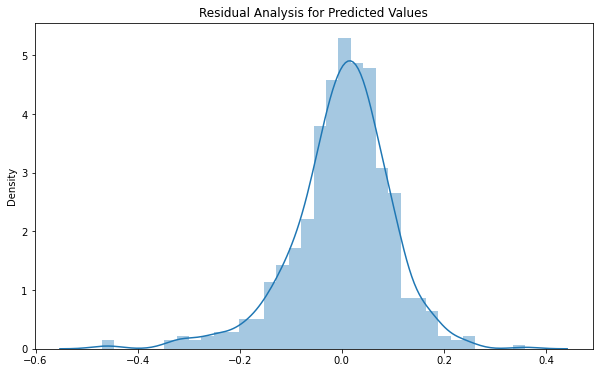

In [40]:
# Predicting for the train data
y_train_pred = lr_model.predict(X_train_sm)

# creating a variable for difference of train and predicted data
res = y_train - y_train_pred

# plotting the distirbution of the residual analysis
plt.figure(figsize = (10,6))
plt.title('Residual Analysis for Predicted Values')
sns.distplot(res)
plt.show()

## Step 5: Predictions and Evaluation on test set

In [41]:
#scaling the Train data
scaler = MinMaxScaler()
df_test = scaler.fit_transform(df_test)
df_test = pd.DataFrame(df_test)
df_test.columns = ['spring', 'summer', 'fall', 'winter', 'jan', 'feb', 'mar', 'apr', 'may',
       'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'tue', 'wed', 'thu',
       'fri', 'sat', 'sun', 'mon', 'clear', 'haze', 'precipitation','yr', 'holiday',
       'workingday', 'temp', 'a_temp','hum', 'windspeed', 'cnt']

In [42]:
# removing the variables working day which has high VIF and monday which has less probability
y_test = df_test['cnt']
X_test = df_test[['spring', 'summer',  'winter', 'mar', 'jul', 'sep', 'dec', 'tue', 'haze', 'precipitation', 'yr', 'temp', 'windspeed']]
# adding the constant to X_train
X_test_sm = sm.add_constant(X_test)
        
#Predict
y_test_pred = lr_model.predict(X_test_sm)
y_test_pred.head()

0    0.395913
1    0.358253
2   -0.023447
3    0.770229
4    0.845682
dtype: float64

In [43]:
# r2 score from  the model 
r2_score(y_true = y_test, y_pred = y_test_pred)

0.8032504219967305

We can see that the equation of our best fitted line is:

$cnt$ = 0.1959 - 0.1086 X $spring$ + 0.0350 X $summer$ + 0.0833 X $winter$ + 0.0438 X $mar$ - 0.0561 X $jul$ + 0.0572 X $sep$ - 0.0389 X $dec$ - 0.0418 X $tue$ - 0.0841 X $haze$ - 0.2737 X $precipitation$ + 0.02529 X $yr$ + 0.4884 X $temp$ - 0.1004 X $windspeed$